In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
y_train[0]

5

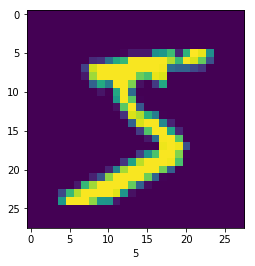

In [5]:
#Lets draw an image
plt.figure()
plt.imshow(x_train[0])
plt.xlabel(y_train[0])
plt.show()

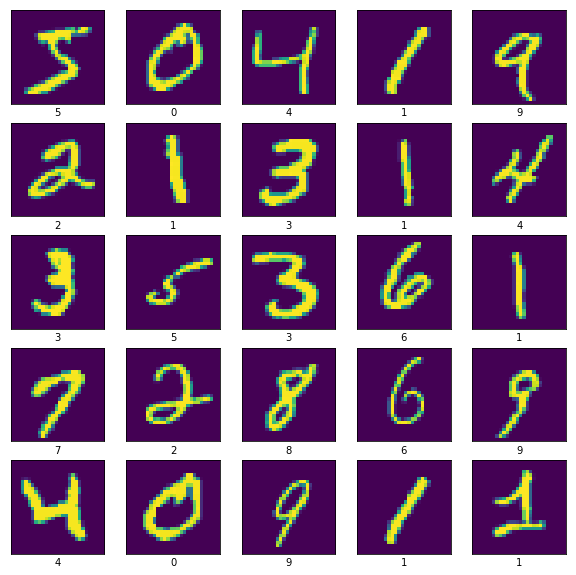

In [6]:
#Lets draw few more images
plt.figure(figsize=(10,10))#overall fig size
for i in range(25):
    plt.subplot(5,5,i+1)#draw a 5X5 image at place ith place
    plt.xticks([])#removes ticks on X side
    plt.yticks([])#removes ticks on y side
    plt.imshow(x_train[i]) #draw image of i
    plt.xlabel(y_train[i]) #draw label of i
    
plt.show()   #show complete plt 

In [7]:
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train/255
x_test = x_test/255

print(input_shape,num_classes)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(28, 28, 1) 10
(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(5,5),padding='same',input_shape=input_shape))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

#model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
________________________________________________

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])



In [10]:
history = model.fit(x_train,y_train,epochs=1,verbose=1,batch_size=32,validation_data=(x_test,y_test),shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0973 - accuracy: 0.9698 - val_loss: 0.0611 - val_accuracy: 0.9804


In [11]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [12]:
y_pred = model.predict(x_test)

In [13]:
print(y_pred[0],np.argmax(y_pred[0]),y_test[0],np.argmax(y_test[i]))

[2.7579552e-09 4.4225281e-08 5.7881220e-08 1.9201081e-05 4.5046347e-10
 1.3722799e-07 2.2463507e-12 9.9997926e-01 9.5458937e-08 1.0642631e-06] 7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 4


In [14]:
x_test_for_print = x_test.reshape(x_test.shape[0], img_rows, img_cols)


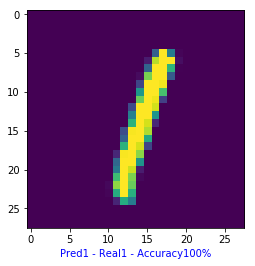

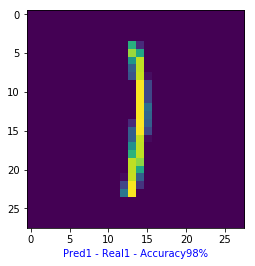

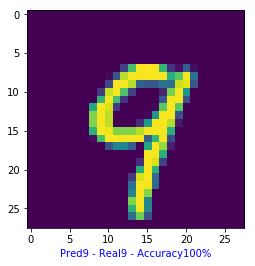

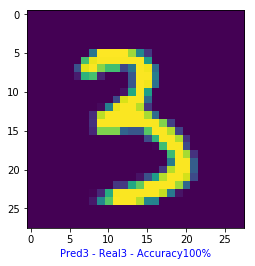

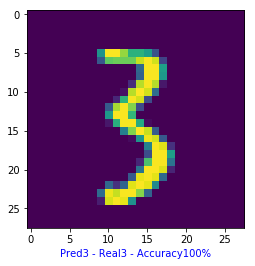

In [19]:
def print_pred(i):
    plt.imshow(x_test_for_print[i])
    if(np.argmax(y_pred[i]) == np.argmax(y_test[i])):
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel( "Pred{} - Real{} - Accuracy{:2.0f}%".format(np.argmax(y_pred[i]),np.argmax(y_test[i]),100*np.max(y_pred[i])),color=color )
    #plt.xlabel( str(np.argmax(y_pred[i])) + ' - ' + str(np.argmax(y_test[i])),color=color )
    plt.show()
print_pred(5)
print_pred(40)
print_pred(12)
print_pred(32)
print_pred(112)


